<a href="https://colab.research.google.com/github/kiran2424/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NYC Taxi Trip Time Prediction/NYC Taxi Data.csv')

In [4]:
data.shape

(1458644, 11)

In [5]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
data.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [9]:
data['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

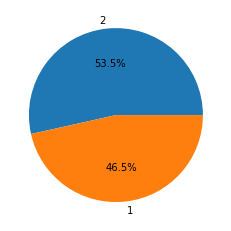

In [10]:
vendor_id = data['vendor_id'].value_counts()
plt.pie(vendor_id,labels=['2','1'],autopct='%1.1f%%')
plt.show()

In [11]:
data['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


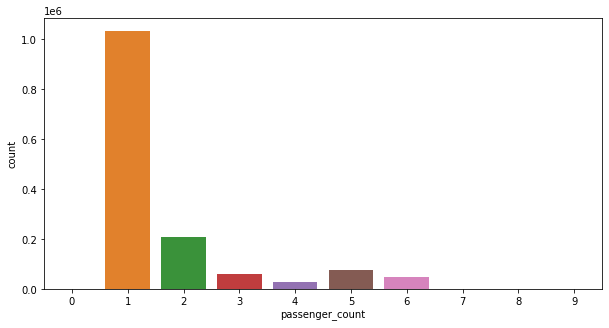

In [12]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['passenger_count'])
plt.show()

In [13]:
data['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

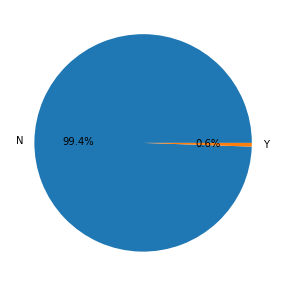

In [14]:
store_and_fwd_flag = data['store_and_fwd_flag'].value_counts()
plt.pie(store_and_fwd_flag,labels=['N','Y'],autopct='%1.1f%%')
plt.show()

As we see aboe pick up and drop off time is in object datatype. So lets convert it into datetime format.

In [15]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [16]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

As we can see above, both pickup_datetime and dropoff datetime is now of datetime datatype 

Now for further analysis we will need pickup days, time, month differently.
So lets seperate the datetime feature into different features.

In [17]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['pickup_date']=data['pickup_datetime'].dt.day
data['pickup_month']=data['pickup_datetime'].dt.month
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['pickup_minutes']=data['pickup_datetime'].dt.minute

In [18]:
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()
data['dropoff_date']=data['dropoff_datetime'].dt.day
data['dropoff_month']=data['dropoff_datetime'].dt.month
data['dropoff_hour']=data['dropoff_datetime'].dt.hour
data['dropoff_minutes']=data['dropoff_datetime'].dt.minute

In [19]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,pickup_date,pickup_month,pickup_hour,pickup_minutes,dropoff_day,dropoff_date,dropoff_month,dropoff_hour,dropoff_minutes
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,14,3,17,24,Monday,14,3,17,32
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,12,6,0,43,Sunday,12,6,0,54
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,19,1,11,35,Tuesday,19,1,12,10
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,6,4,19,32,Wednesday,6,4,19,39
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,26,3,13,30,Saturday,26,3,13,38


As we have separated all the important imformation from datetime.

Now lets figure out the maximum pick-up and drop is in which timezone: Morning, Afternoon, Evening or Late Night

In [20]:
def time_of_day(x):
    if x in range(4,6):
        return 'Early Morning'
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [21]:
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday']=data['dropoff_hour'].apply(time_of_day)


In [22]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,pickup_hour,pickup_minutes,dropoff_day,dropoff_date,dropoff_month,dropoff_hour,dropoff_minutes,pickup_timeofday,dropoff_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,17,24,Monday,14,3,17,32,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,0,43,Sunday,12,6,0,54,Late night,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,11,35,Tuesday,19,1,12,10,Morning,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,19,32,Wednesday,6,4,19,39,Evening,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,13,30,Saturday,26,3,13,38,Afternoon,Afternoon


Now lets analyse the data w.r.t month, weekday, time of day and date

In [23]:
data['pickup_timeofday'].value_counts()

Evening          489961
Morning          357477
Late night       290963
Afternoon        289449
Early Morning     30794
Name: pickup_timeofday, dtype: int64

In [24]:
data['dropoff_timeofday'].value_counts()

Evening          489912
Morning          343679
Late night       305666
Afternoon        288312
Early Morning     31075
Name: dropoff_timeofday, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


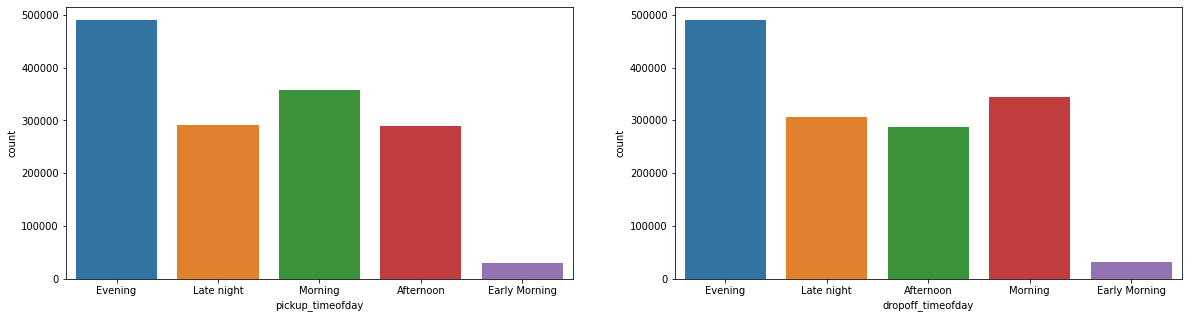

In [25]:
plt.rcParams['figure.figsize'] = (20, 5)
fig, axes = plt.subplots(1, 2)
sns.countplot(data['pickup_timeofday'],ax=axes[0])
sns.countplot(data['dropoff_timeofday'],ax=axes[1])
plt.show()

In [26]:
data['pickup_day'].value_counts()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

In [27]:
data['dropoff_day'].value_counts()

Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropoff_day, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


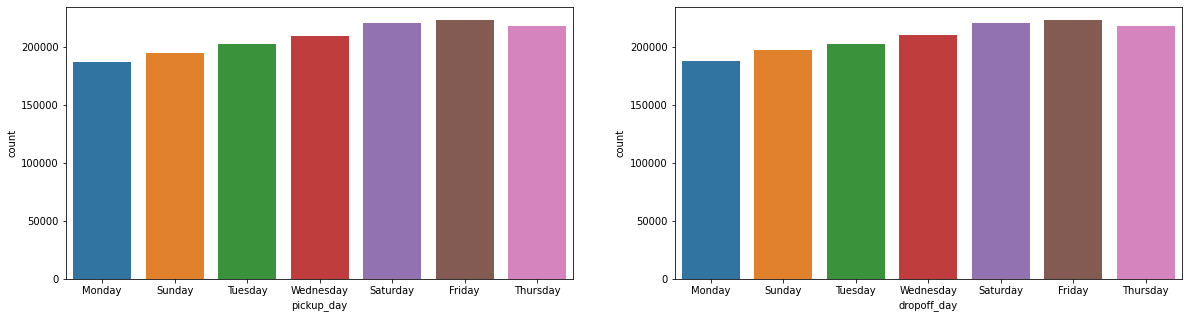

In [28]:
plt.rcParams['figure.figsize'] = (20, 5)
fig, axes = plt.subplots(1, 2)
sns.countplot(data['pickup_day'],ax=axes[0])
sns.countplot(data['dropoff_day'],ax=axes[1])
plt.show()

In [29]:
data['pickup_date'].value_counts()

16    51027
14    50488
5     50176
12    50080
15    49791
4     49655
9     49634
6     49476
13    49293
19    49265
20    49198
17    48968
10    48867
11    48864
7     48671
21    48306
8     48248
3     47945
18    47925
2     47752
26    47595
22    47254
27    46957
29    46807
1     46612
25    46450
28    45891
24    43876
23    41450
30    39135
31    22988
Name: pickup_date, dtype: int64

In [30]:
data['dropoff_date'].value_counts()

16    50974
14    50404
5     50183
12    50093
15    49852
9     49551
6     49533
4     49530
13    49324
19    49251
20    49186
10    49024
17    49017
11    48767
7     48710
21    48329
8     48207
3     48044
18    47918
2     47632
26    47543
22    47312
27    47033
29    46803
1     46675
25    46412
28    45908
24    43804
23    41508
30    39092
31    23025
Name: dropoff_date, dtype: int64

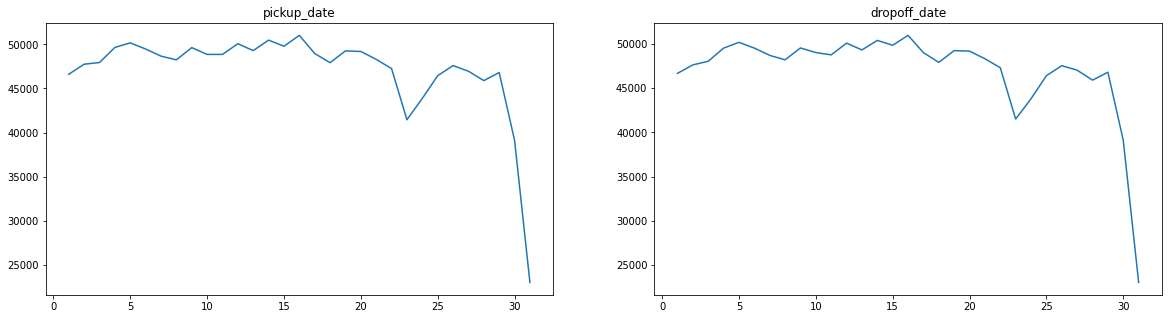

In [31]:
a=data['pickup_date'].value_counts().sort_index(ascending=True)
b=data['dropoff_date'].value_counts().sort_index(ascending=True)
plt.rcParams['figure.figsize'] = (20, 5)
fig, axes = plt.subplots(1, 2)
axes[0].plot(a)
axes[0].set_title('pickup_date')
axes[1].plot(b)
axes[1].set_title('dropoff_date')
plt.show()

In [32]:
data['pickup_month'].value_counts()

3    256189
4    251645
5    248487
2    238300
6    234316
1    229707
Name: pickup_month, dtype: int64

In [33]:
data['dropoff_month'].value_counts()

3    256135
4    251636
5    248555
2    238292
6    234243
1    229656
7       127
Name: dropoff_month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


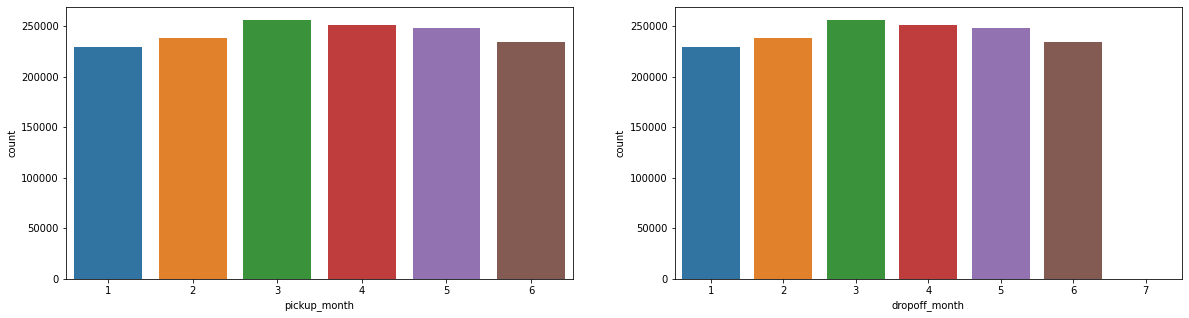

In [34]:
plt.rcParams['figure.figsize'] = (20, 5)
fig, axes = plt.subplots(1, 2)
sns.countplot(data['pickup_month'],ax=axes[0])
sns.countplot(data['dropoff_month'],ax=axes[1])
plt.show()

Lets plot latitude and longitude

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

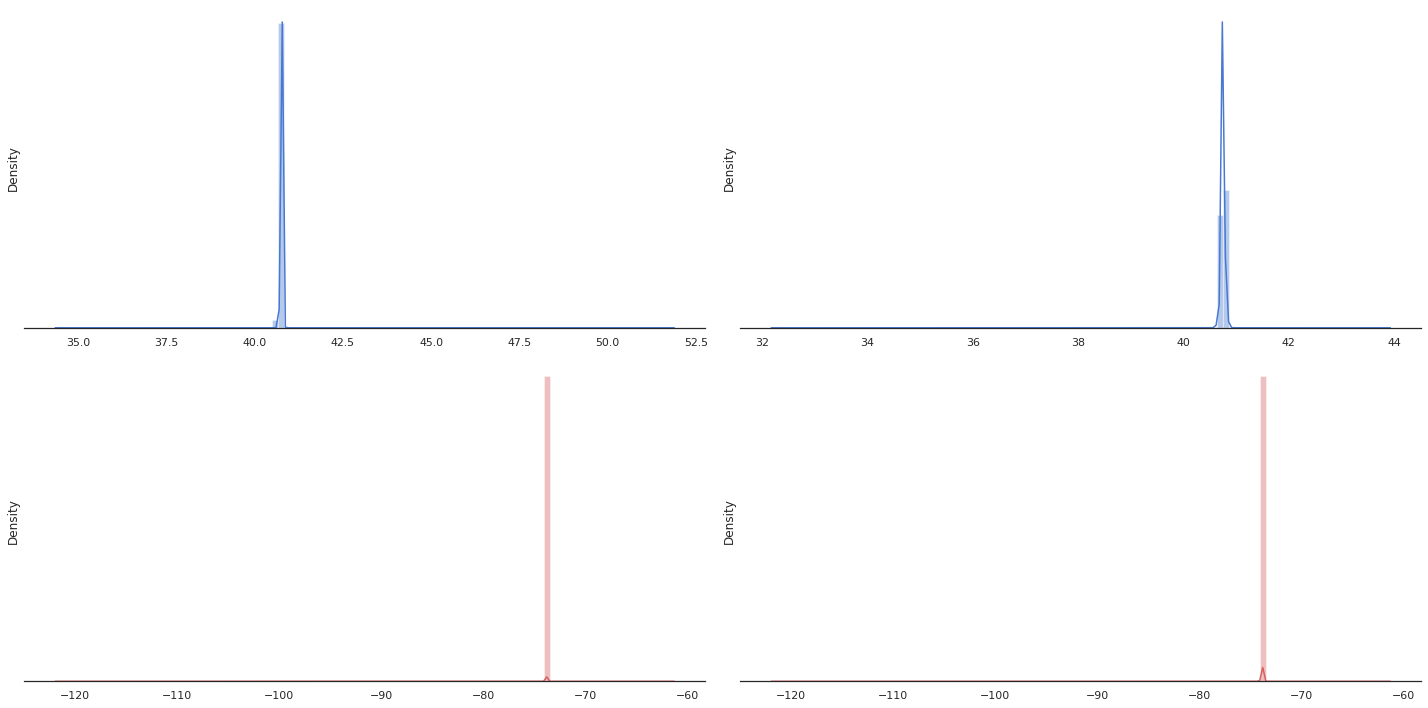

In [35]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(20, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(data['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(data['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[1,0])
sns.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[0,1])
sns.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

The above plots shows us that most of the rides are centered around the following coordinates:

Latitude: 40 to 41

Longitude: -73 to -74

If we see from the means of the latitude and longitude values that we derived above, we see that these values are correct. Also, if we check out these coordinates on a map, we get that the coordinates of (40.7128, 74.0060) correspond to that of NYC. Hence, our plot is correct.

One anomaly that we see here is that some of the trips that are from some other lat like 32 to 44 are taking a very long time and hence effecting the plot as such. These values are outliers and in the next step, we'll provide the bounds for the coordinates so as to remove these outliers.

Also, we see that the two vendors are positive correlated with the pickup and dropoff latitude and longitude as well. This means that they only operate in this region.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

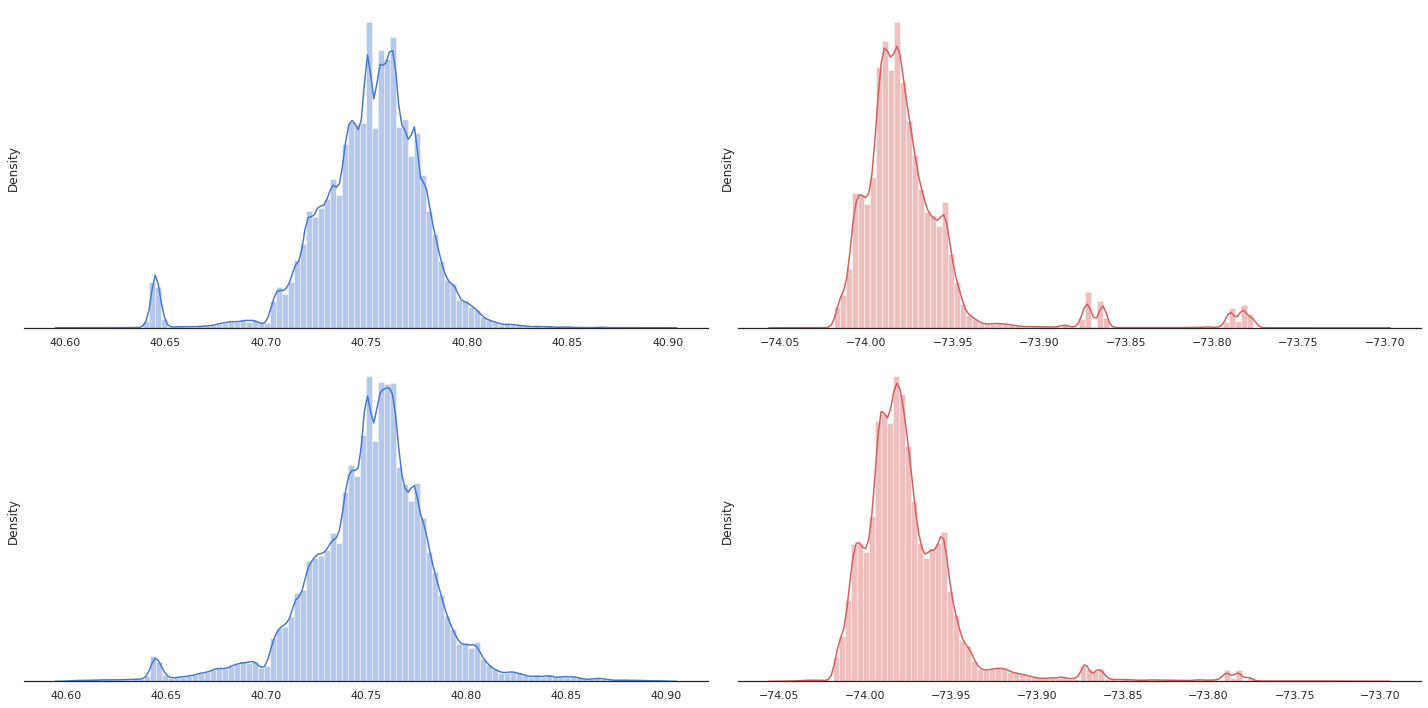

In [36]:
data= data.loc[(data.pickup_latitude > 40.6) & (data.pickup_latitude < 40.9)]
data= data.loc[(data.dropoff_latitude>40.6) & (data.dropoff_latitude < 40.9)]
data = data.loc[(data.dropoff_longitude > -74.05) & (data.dropoff_longitude < -73.7)]
data= data.loc[(data.pickup_longitude > -74.05) & (data.pickup_longitude < -73.7)]

sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(20, 10), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(data['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(data['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sns.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1, 0])
sns.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

In [37]:
data.shape

(1452385, 23)

So as we have data of longitude and latitude, we can calcultale distance...
For that lets import required library

In [38]:
from geopy.distance import great_circle

In [39]:
def cal_distance(p_lat,p_long,d_lat,d_long):
 
 start_coordinates=(p_lat,p_long)
 stop_coordinates=(d_lat,d_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [40]:
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']), axis=1)

In [41]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour,pickup_minutes,dropoff_day,dropoff_date,dropoff_month,dropoff_hour,dropoff_minutes,pickup_timeofday,dropoff_timeofday,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,17,24,Monday,14,3,17,32,Evening,Evening,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,43,Sunday,12,6,0,54,Late night,Late night,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,11,35,Tuesday,19,1,12,10,Morning,Afternoon,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,19,32,Wednesday,6,4,19,39,Evening,Evening,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,13,30,Saturday,26,3,13,38,Afternoon,Afternoon,1.188590


In [42]:
data['distance'].value_counts()

0.000000     5567
0.000424       37
0.000424       35
0.000424       29
0.000424       20
             ... 
2.434980        1
2.970313        1
19.272953       1
7.817040        1
1.134044        1
Name: distance, Length: 1446492, dtype: int64

We see there are 5567 trips with 0 km distance. **(reframe it)**

The reasons for 0 km distance can be:

The dropoff location couldn’t be tracked.
The driver deliberately took this ride to complete a target ride number.
The passengers canceled the trip.
We will analyze these trips further in bivariate analysis.
Lets replace 0 km with mean.

In [43]:
mean_dist=data['distance'].mean()
data.loc[data['distance']==0,'distance']=mean_dist

So from the data our target variable (dependent variable) is trip duration.

In [44]:
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from datetime import datetime as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')

In [45]:
data['trip_duration'].value_counts()

368      1624
408      1584
348      1582
367      1581
358      1577
         ... 
7289        1
5848        1
85894       1
6583        1
6124        1
Name: trip_duration, Length: 7352, dtype: int64

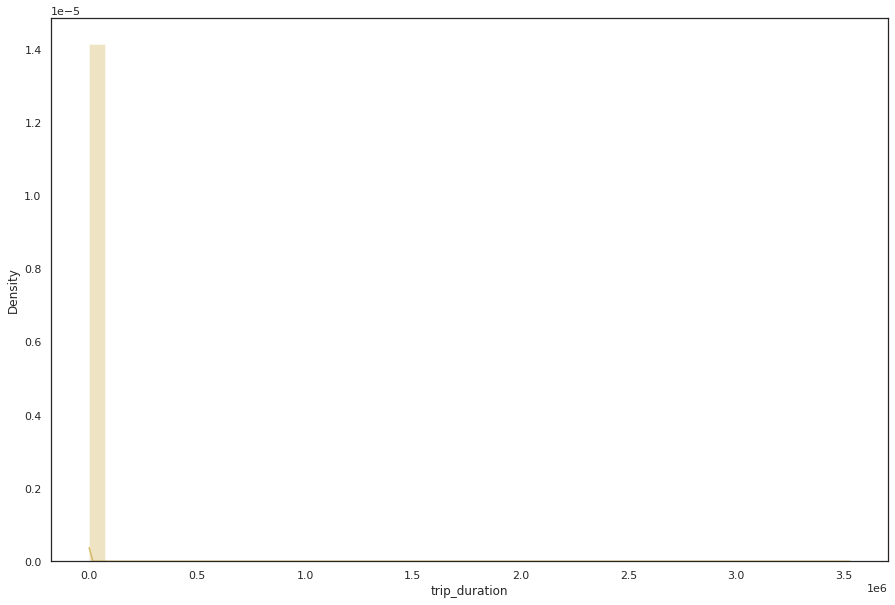

In [46]:
plt.figure(figsize=(15,10))
sns.distplot(data['trip_duration'],color="y")

extremely right skewed

In [47]:
print(data['trip_duration'].nlargest(10))

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
Name: trip_duration, dtype: int64


4 outliers so we will not drop it but will apply log transformation

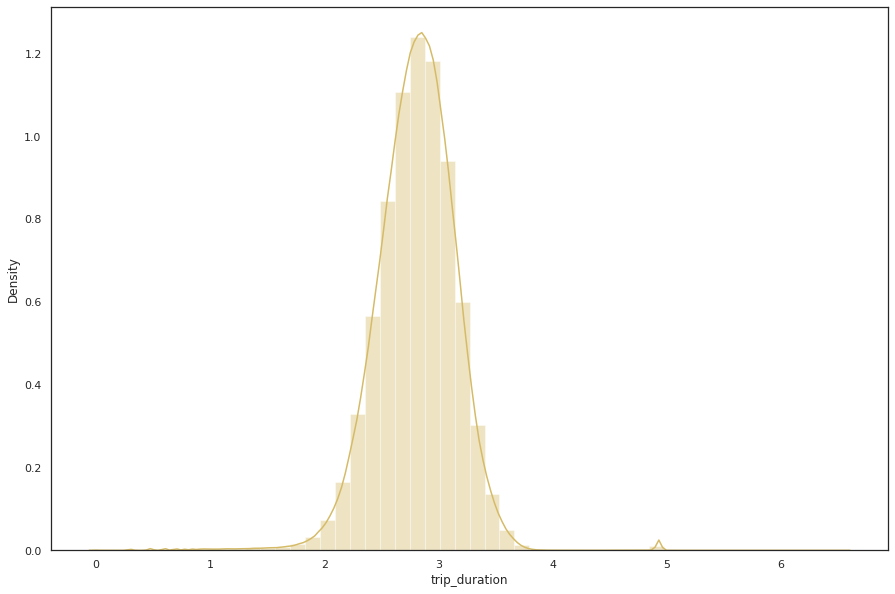

In [48]:
plt.figure(figsize=(15,10))
sns.distplot(np.log10(data['trip_duration']),color="y")

In [49]:
data['trip_duration_in_hour']=data['trip_duration']/3600

In [50]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_minutes,dropoff_day,dropoff_date,dropoff_month,dropoff_hour,dropoff_minutes,pickup_timeofday,dropoff_timeofday,distance,trip_duration_in_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,24,Monday,14,3,17,32,Evening,Evening,1.498523,0.126389
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,43,Sunday,12,6,0,54,Late night,Late night,1.805510,0.184167
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,35,Tuesday,19,1,12,10,Morning,Afternoon,6.385108,0.590000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,32,Wednesday,6,4,19,39,Evening,Evening,1.485501,0.119167
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,30,Saturday,26,3,13,38,Afternoon,Afternoon,1.188590,0.120833


We will now have a look at the distribution of the distance variable against the trip duration in hour feature.

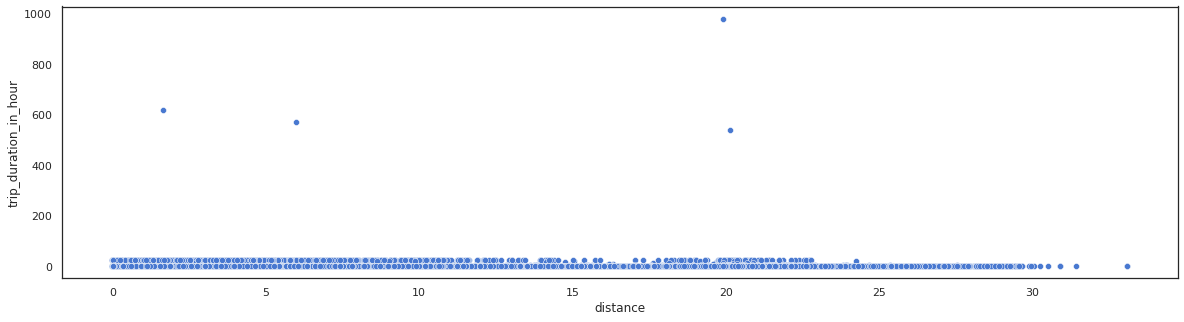

In [51]:
sns.scatterplot(x='distance',y='trip_duration_in_hour',data=data)


We will now have a look at the distribution of the distance variable against the trip duration in hour feature using log transformation


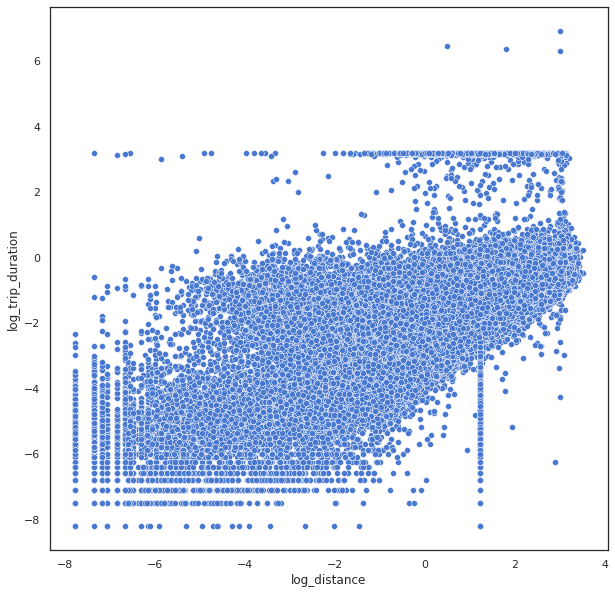

In [52]:
plt.figure(figsize=(10,10))
data['log_distance']=np.log(data.distance)
data['log_trip_duration']=np.log(data.trip_duration_in_hour)
sns.scatterplot(x='log_distance',y='log_trip_duration',data=data)

Here we see that the log transformed value of trip duration and distance has a somewhat linear relationship

We will now create a new feature called speed. 

In [53]:
data['speed']=data['distance']/data['trip_duration_in_hour']


In [54]:
data['speed'].value_counts()

3038.140341    106
4050.853788     98
2430.512273     87
1519.070171     63
1350.284596     61
              ... 
10.771801        1
10.974388        1
15.013387        1
1.787178         1
20.618974        1
Name: speed, Length: 1448291, dtype: int64

In [55]:
data['speed'].mean()

16.074601692981087

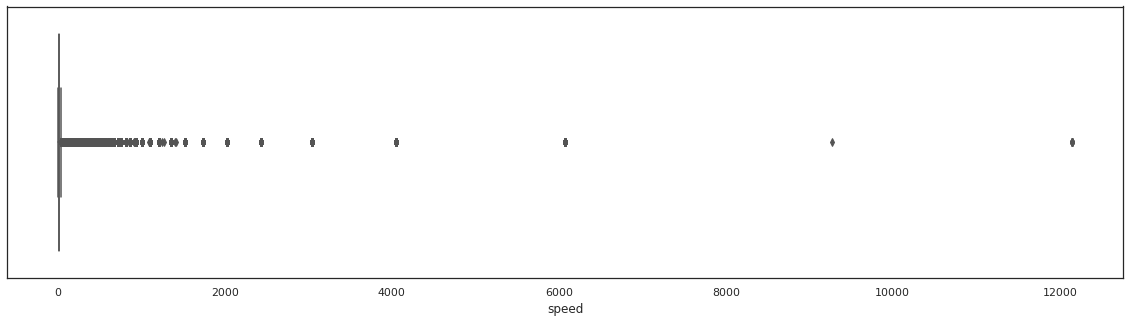

In [56]:
sns.boxplot(data['speed'])

THe average speed in newyork city is 16 km/hr

In [57]:
numeric_features = data.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'pickup_date',
       'pickup_month', 'pickup_hour', 'pickup_minutes', 'dropoff_date',
       'dropoff_month', 'dropoff_hour', 'dropoff_minutes', 'distance',
       'trip_duration_in_hour', 'log_distance', 'log_trip_duration', 'speed'],
      dtype='object')

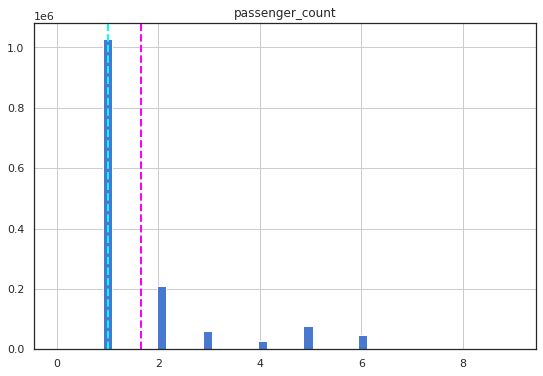

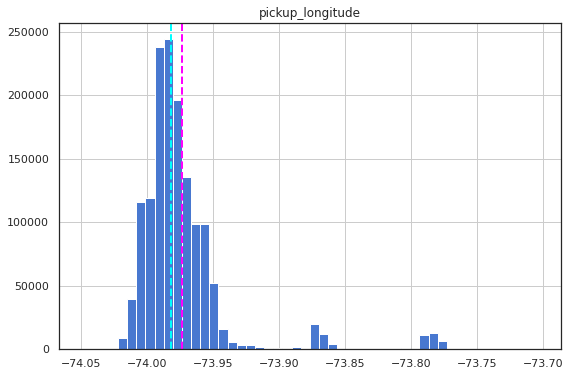

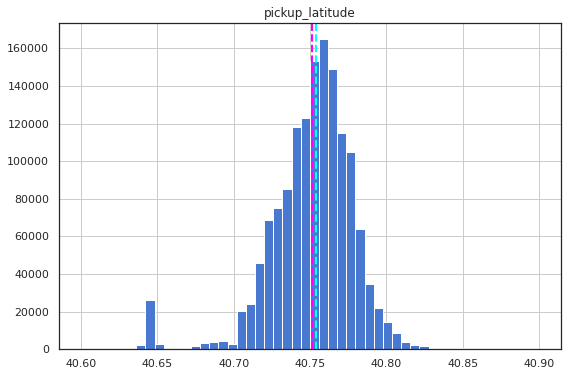

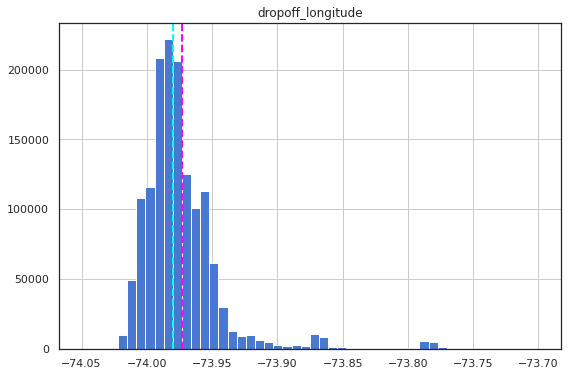

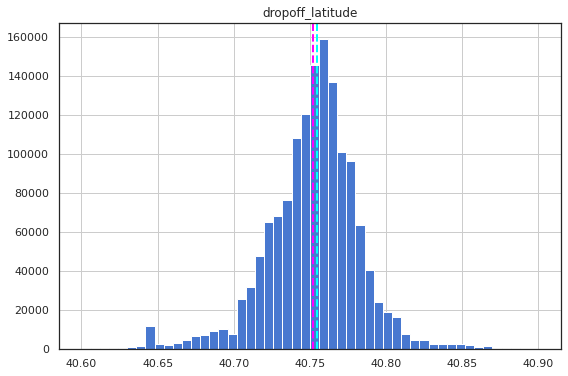

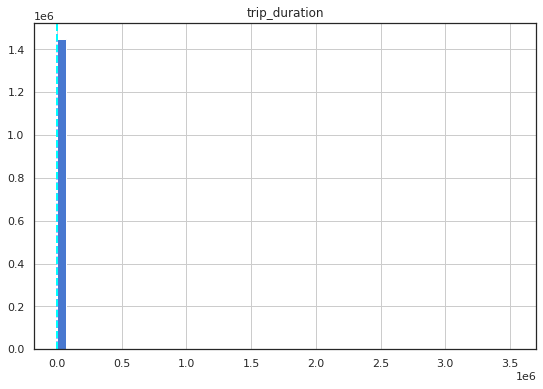

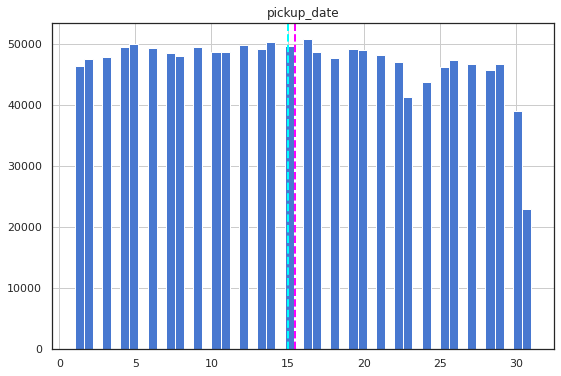

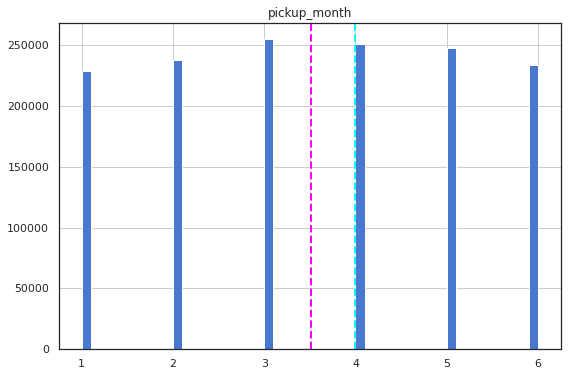

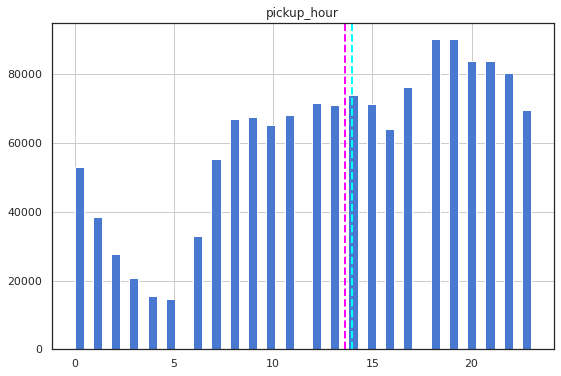

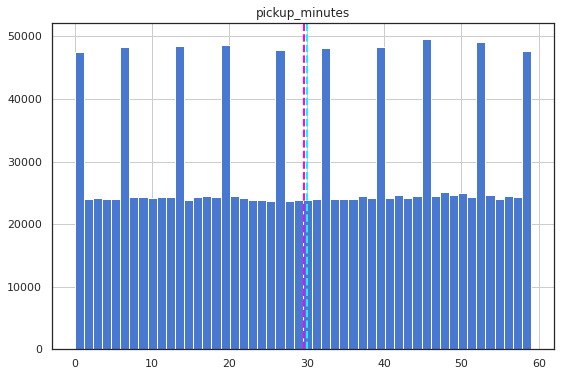

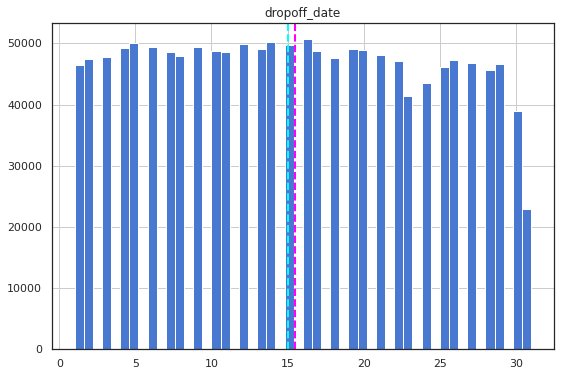

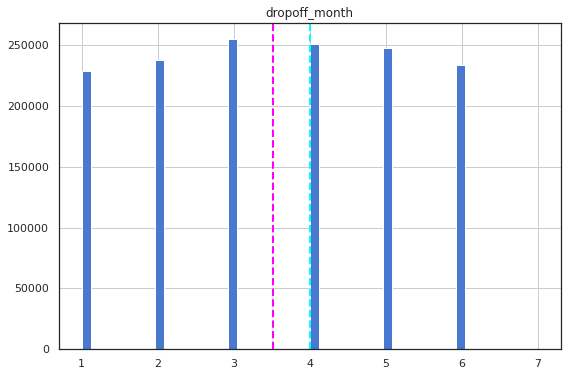

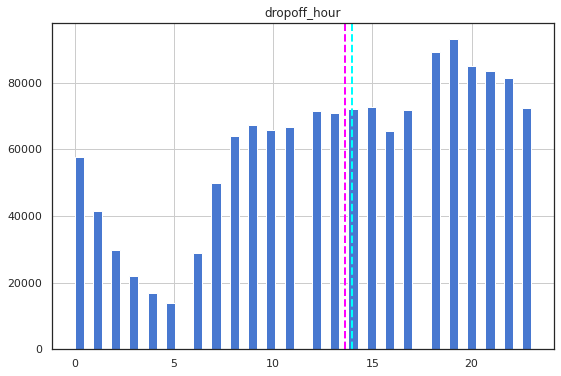

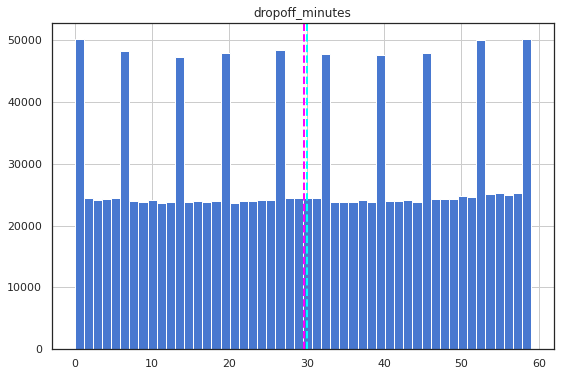

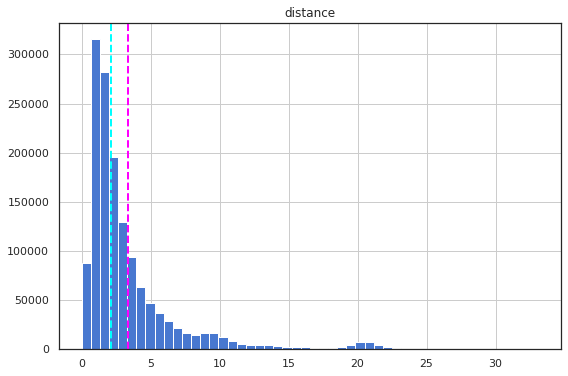

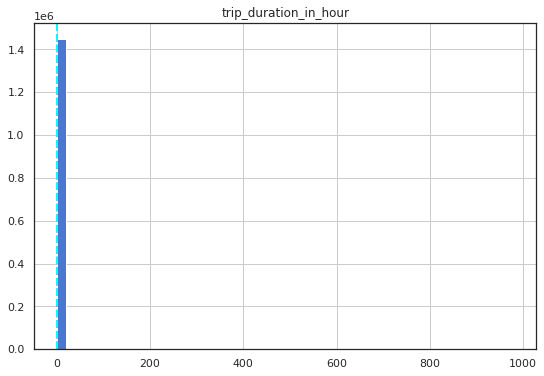

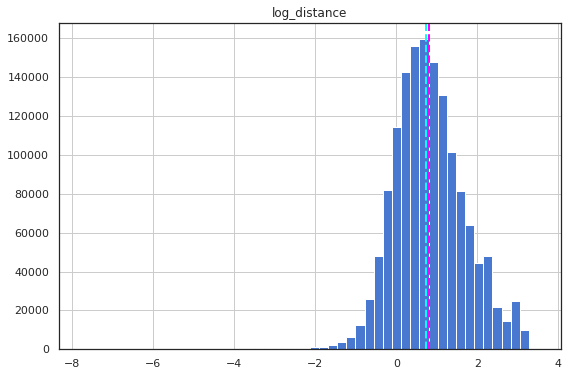

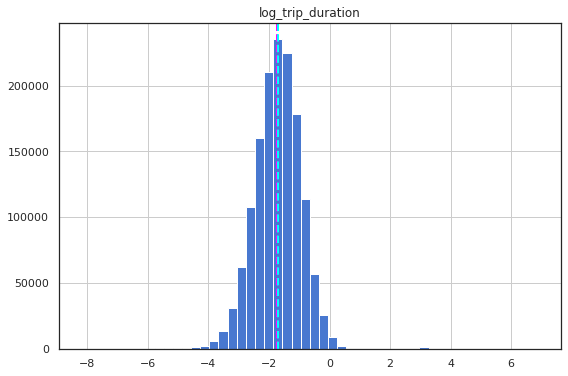

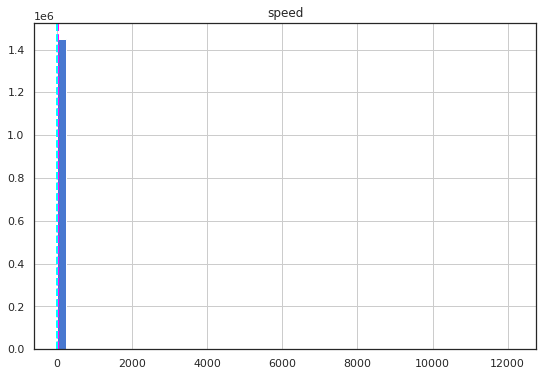

In [58]:
# plot a bar plot for each categorical feature count (except vendor id)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

Now lets see correlation between target and independent variables

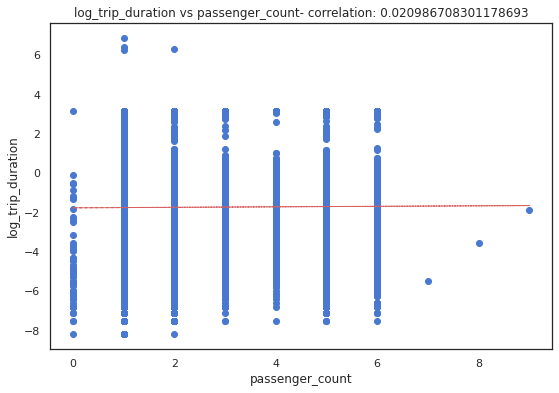

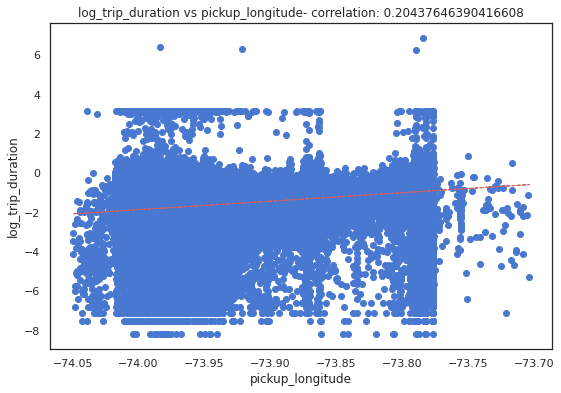

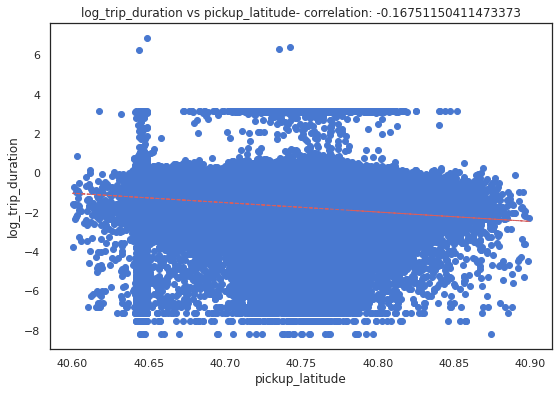

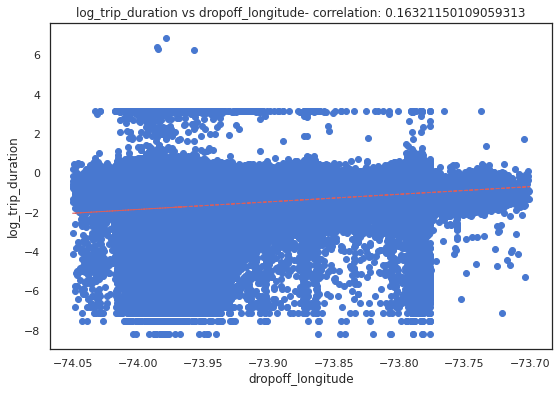

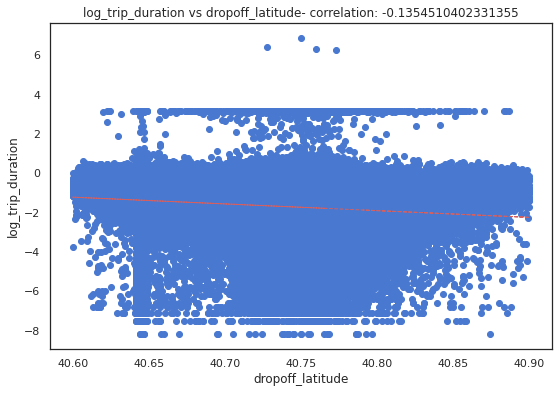

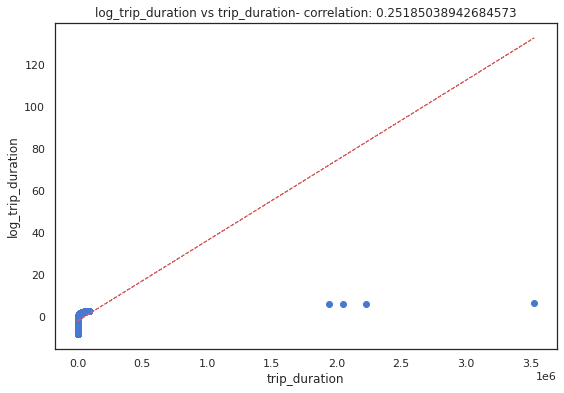

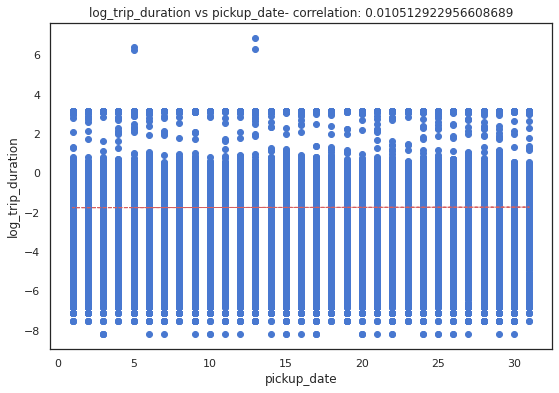

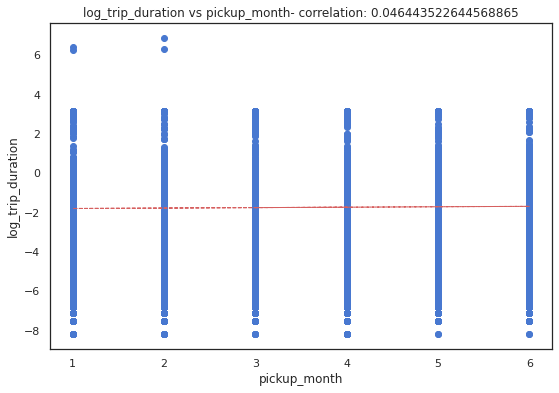

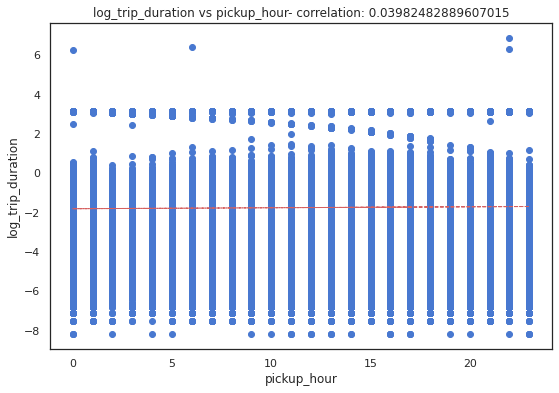

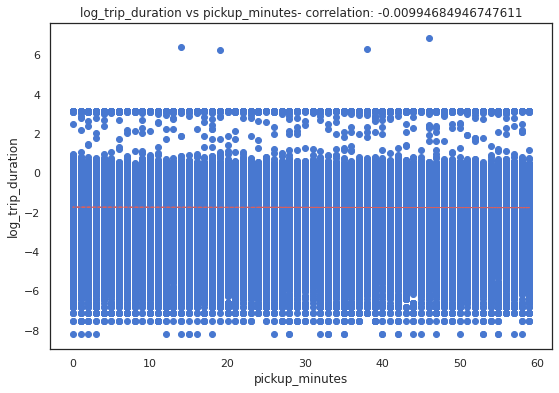

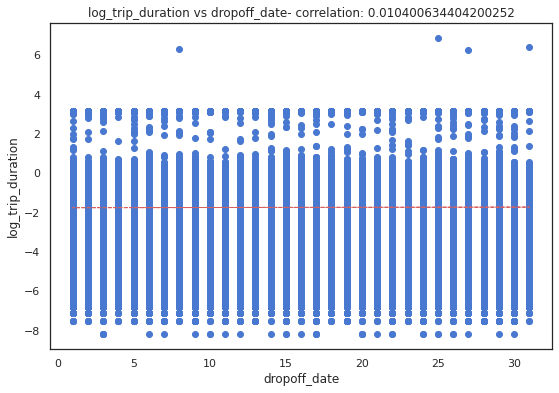

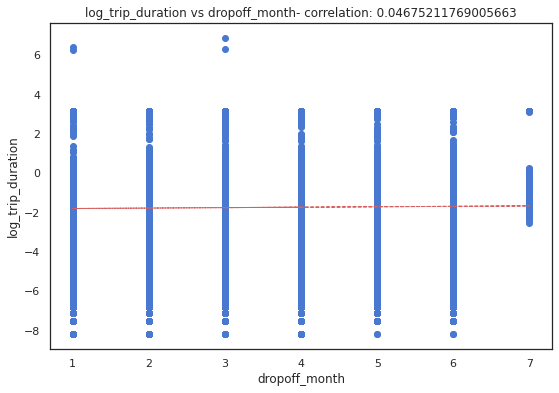

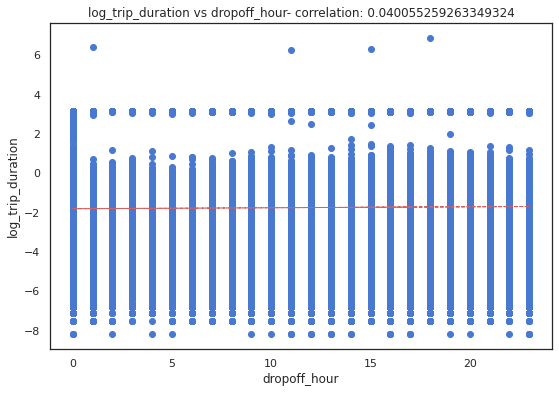

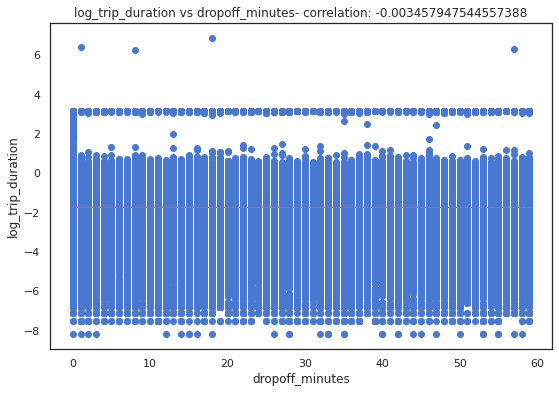

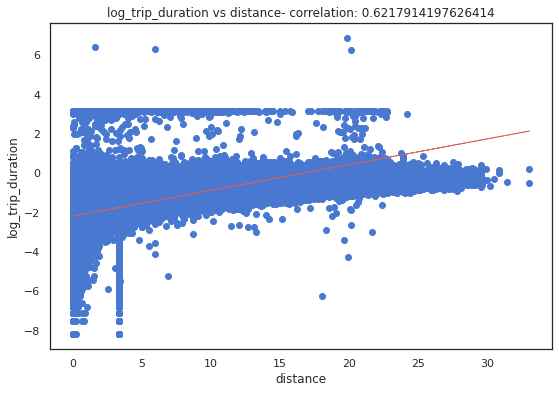

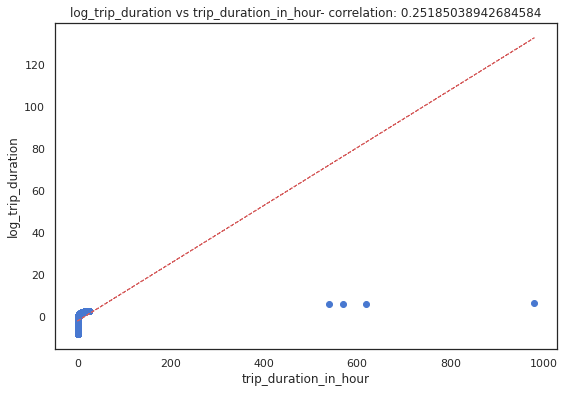

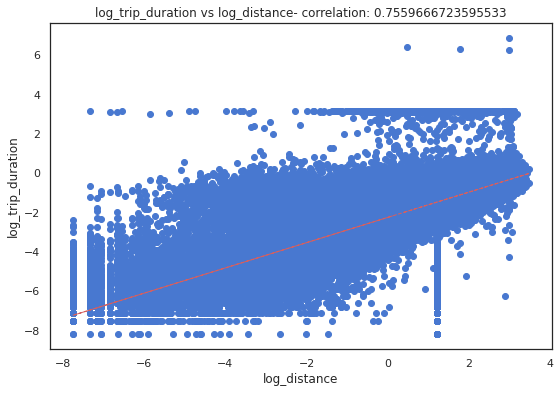

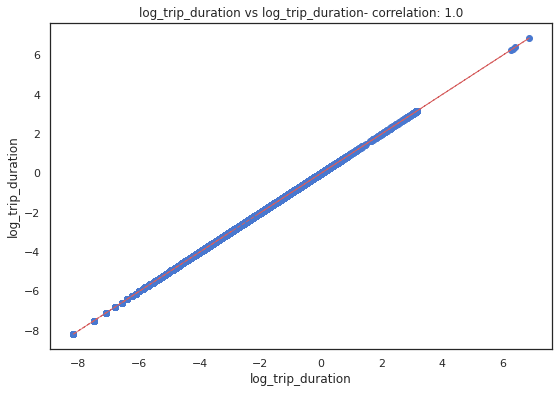

In [59]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['log_trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('log_trip_duration')
    ax.set_title('log_trip_duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data['log_trip_duration'], 1)
    y_hat = np.poly1d(z)(data[col])

    plt.plot(data[col], y_hat, "r--", lw=1)

plt.show()

The correlation betweem trip duration and distance is positive compared to other variables

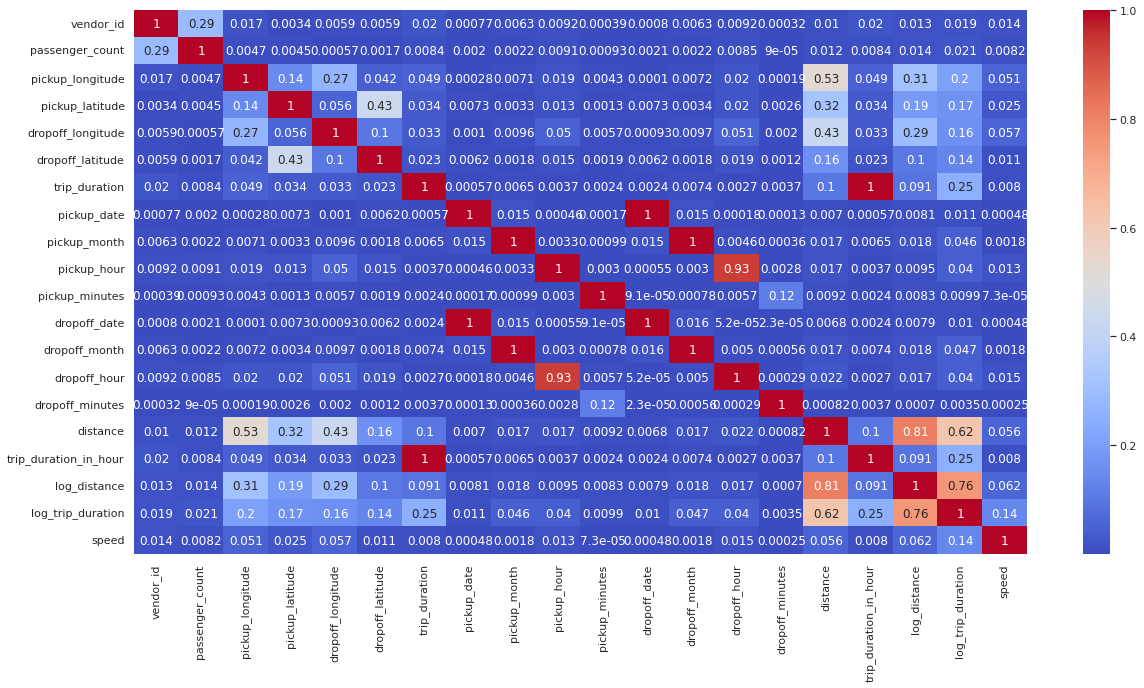

In [60]:
# Correlation
plt.figure(figsize=(20,10))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [61]:
categorical_features = data.describe(include=['object','category']).columns
categorical_features

Index(['id', 'store_and_fwd_flag', 'pickup_day', 'dropoff_day',
       'pickup_timeofday', 'dropoff_timeofday'],
      dtype='object')

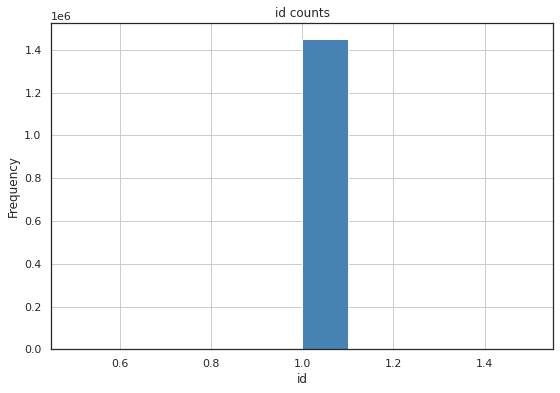

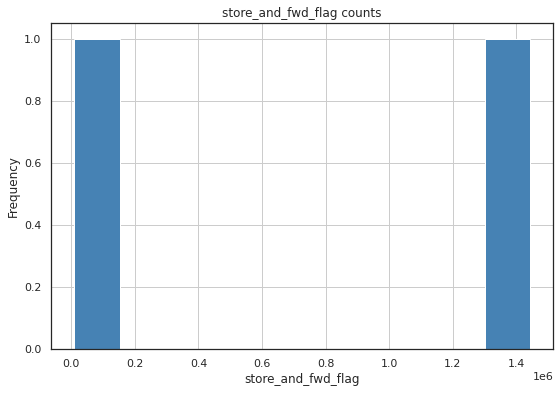

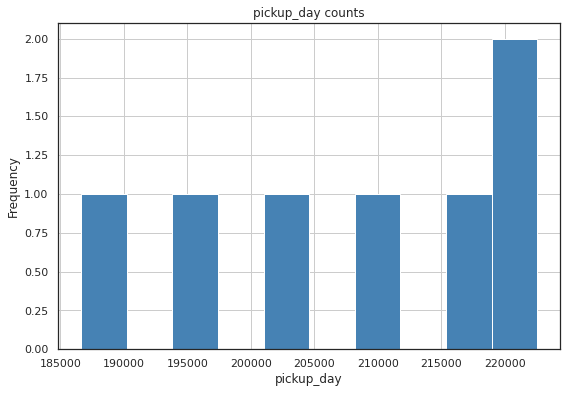

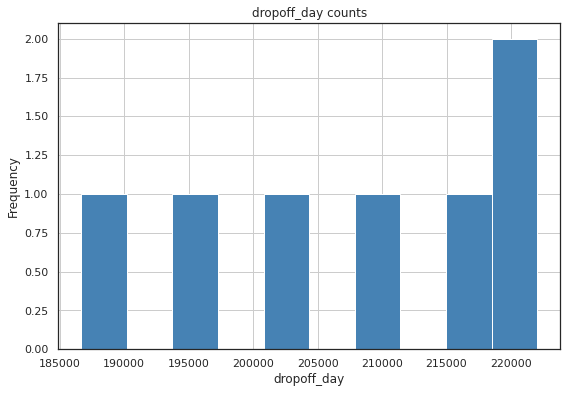

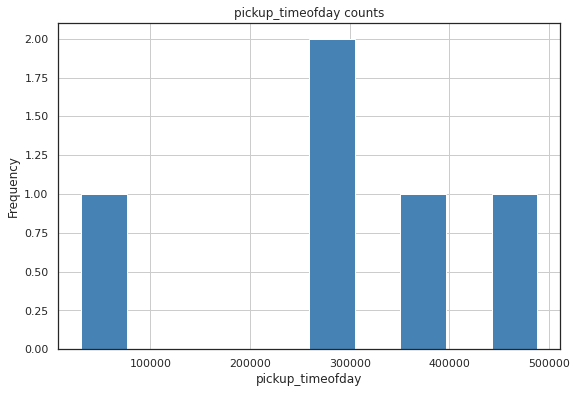

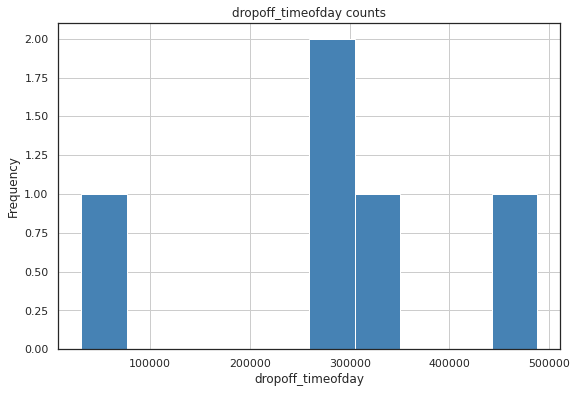

In [62]:
for col in categorical_features:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.hist(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

Test Train Split

In [63]:
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'pickup_date',
       'pickup_month', 'pickup_hour', 'pickup_minutes', 'dropoff_date',
       'dropoff_month', 'dropoff_hour', 'dropoff_minutes', 'distance',
       'trip_duration_in_hour', 'log_distance', 'log_trip_duration', 'speed'],
      dtype='object')

In [64]:
categorical_features

Index(['id', 'store_and_fwd_flag', 'pickup_day', 'dropoff_day',
       'pickup_timeofday', 'dropoff_timeofday'],
      dtype='object')

Lets convert pickup_day and dropoff_day catagorical values into numerical values

In [65]:
data.pickup_day[data.pickup_day == 'Monday'] = 0
data.pickup_day[data.pickup_day == 'Tuesday'] = 1
data.pickup_day[data.pickup_day == 'Wednesday'] = 2
data.pickup_day[data.pickup_day == 'Thursday'] = 3
data.pickup_day[data.pickup_day == 'Friday'] = 4
data.pickup_day[data.pickup_day == 'Saturday'] = 5
data.pickup_day[data.pickup_day == 'Sunday'] = 6

In [66]:
data.dropoff_day[data.dropoff_day == 'Monday'] = 0
data.dropoff_day[data.dropoff_day == 'Tuesday'] = 1
data.dropoff_day[data.dropoff_day == 'Wednesday'] = 2
data.dropoff_day[data.dropoff_day == 'Thursday'] = 3
data.dropoff_day[data.dropoff_day == 'Friday'] = 4
data.dropoff_day[data.dropoff_day == 'Saturday'] = 5
data.dropoff_day[data.dropoff_day == 'Sunday'] = 6

In [67]:
dependent_variable = 'log_trip_duration'

In [68]:
independent_variables = list(data[['pickup_date','pickup_day', 'pickup_month', 'pickup_hour', 'pickup_minutes', 'dropoff_date','dropoff_day','dropoff_month', 'dropoff_hour', 'dropoff_minutes', 'log_distance', 'speed']])

In [69]:
# Create the data of independent variables
X = data[independent_variables].values

# Create the dependent variable data
y = data[dependent_variable].values

In [70]:
X

array([[14, 0, 3, ..., 32, 0.40447988729267637, 11.856444895644051],
       [12, 6, 6, ..., 54, 0.5908429449100203, 9.803672684242436],
       [19, 1, 1, ..., 10, 1.8539683280535915, 10.822216127404797],
       ...,
       [22, 4, 4, ..., 10, 2.05727476766276, 36.8699222299841],
       [5, 1, 1, ..., 2, 0.08852854108761411, 10.544867470822146],
       [5, 1, 4, ..., 47, 0.1257896205250881, 20.618973885376246]],
      dtype=object)

In [71]:
y

array([-2.06839171, -1.69191413, -0.52763274, ..., -1.55012134,
       -2.2671107 , -2.90042209])

In [72]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [73]:
# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(1161908, 12) (1161908,)
(290477, 12) (290477,)


In [74]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
X_train

array([[5.33333333e-01, 5.00000000e-01, 4.00000000e-01, ...,
        7.11864407e-01, 7.21753464e-01, 8.98111997e-04],
       [7.66666667e-01, 1.00000000e+00, 6.00000000e-01, ...,
        1.52542373e-01, 7.11627023e-01, 1.34492820e-03],
       [1.33333333e-01, 5.00000000e-01, 8.00000000e-01, ...,
        9.83050847e-01, 7.05661551e-01, 1.52737750e-03],
       ...,
       [9.66666667e-01, 3.33333333e-01, 4.00000000e-01, ...,
        5.76271186e-01, 6.93772830e-01, 6.72295885e-04],
       [3.66666667e-01, 8.33333333e-01, 4.00000000e-01, ...,
        1.52542373e-01, 6.47237110e-01, 6.33277260e-04],
       [3.33333333e-02, 1.66666667e-01, 2.00000000e-01, ...,
        6.44067797e-01, 7.12985314e-01, 9.40347160e-04]])

In [76]:
mean_pred = np.repeat(y_train.mean(),len(y_test))
sqrt(mean_squared_error(y_test, mean_pred))

0.7947185446708289

In [77]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
reg = regressor.fit(X_train, y_train)

In [78]:
reg.score(X_train, y_train)

0.6406455934046507

In [79]:
y_pred_train = regressor.predict(X_train)

In [80]:
y_pred_train

array([-2.00166127, -2.10287676, -2.13996646, ..., -2.19739352,
       -2.64621442, -2.0546101 ])

In [81]:
y_train

array([-2.02537432, -2.54324223, -2.73765067, ..., -2.05096207,
       -2.51536586, -2.17009591])

In [82]:
# Predicting the Test set results
y_pred_test = regressor.predict(X_test)

In [83]:
y_pred_test

array([-0.84989679, -0.73676598, -1.10041055, ..., -0.97892659,
       -2.20556915, -2.24469817])

In [84]:
y_test

array([-0.91629073, -0.94660677, -1.43408502, ..., -0.66035736,
       -2.31095334, -1.7382187 ])

In [88]:
mean_squared_error(y_train, y_pred_train)

0.22705575740318582

In [85]:
mean_squared_error(y_test, y_pred_test)

0.2225016034221319

In [89]:
# Train performance
import math
math.sqrt(mean_squared_error(y_train, y_pred_train))

0.4765036803668843

In [90]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred_test))

0.47170075622382873

In [91]:
r2_score(y_train, y_pred_train)

0.6406455934046507

In [92]:
r2_score(y_test, y_pred_test)

0.6477049216689141

In [98]:
MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_test))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.2225016034221319
RMSE : 0.47170075622382873
R2 : 0.6477049216689141
Adjusted R2 :  0.6476903672286394


Implementing Lasso regression

In [101]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000000)

In [102]:
lasso.score(X_train, y_train)

0.6109180671352736

In [103]:
y_pred_l = lasso.predict(X_test)

In [104]:
MSE  = mean_squared_error((y_test), (y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.24515744022236624
RMSE : 0.49513375992994685
R2 : 0.6118330911857324
Adjusted R2 :  0.6118170547650201


In [105]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [106]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.24558257269258799


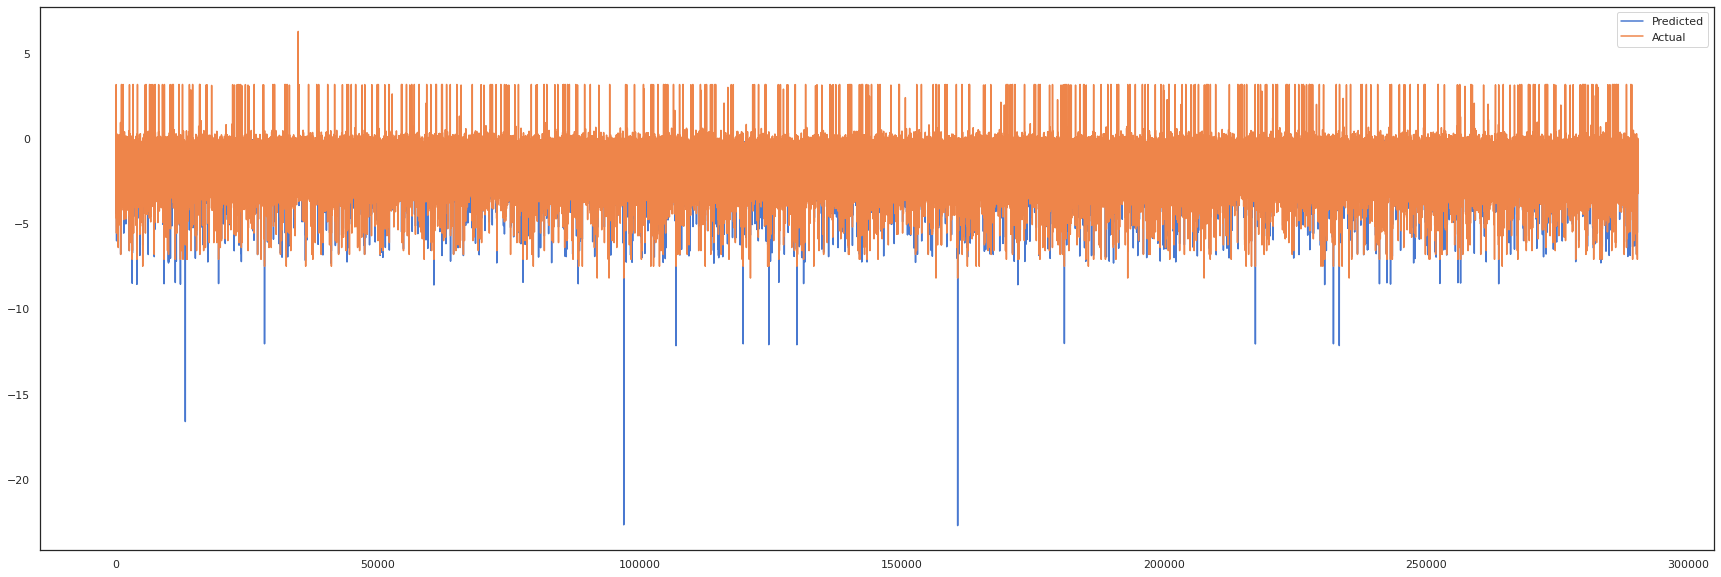

In [107]:
plt.figure(figsize=(30,10))
plt.plot((y_pred_l))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Ridge reg implementation

In [108]:
ridge  = Ridge(alpha=0.0001)

In [109]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [110]:
ridge.score(X_train, y_train)

0.6406455503031342

In [111]:
y_pred_r = ridge.predict(X_test)

In [112]:
MSE  = mean_squared_error((y_test), (y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.22251127121554737
RMSE : 0.4717110039161132
R2 : 0.6476896142914113
Adjusted R2 :  0.6476750592187396


In [113]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [114]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.22917951713965193


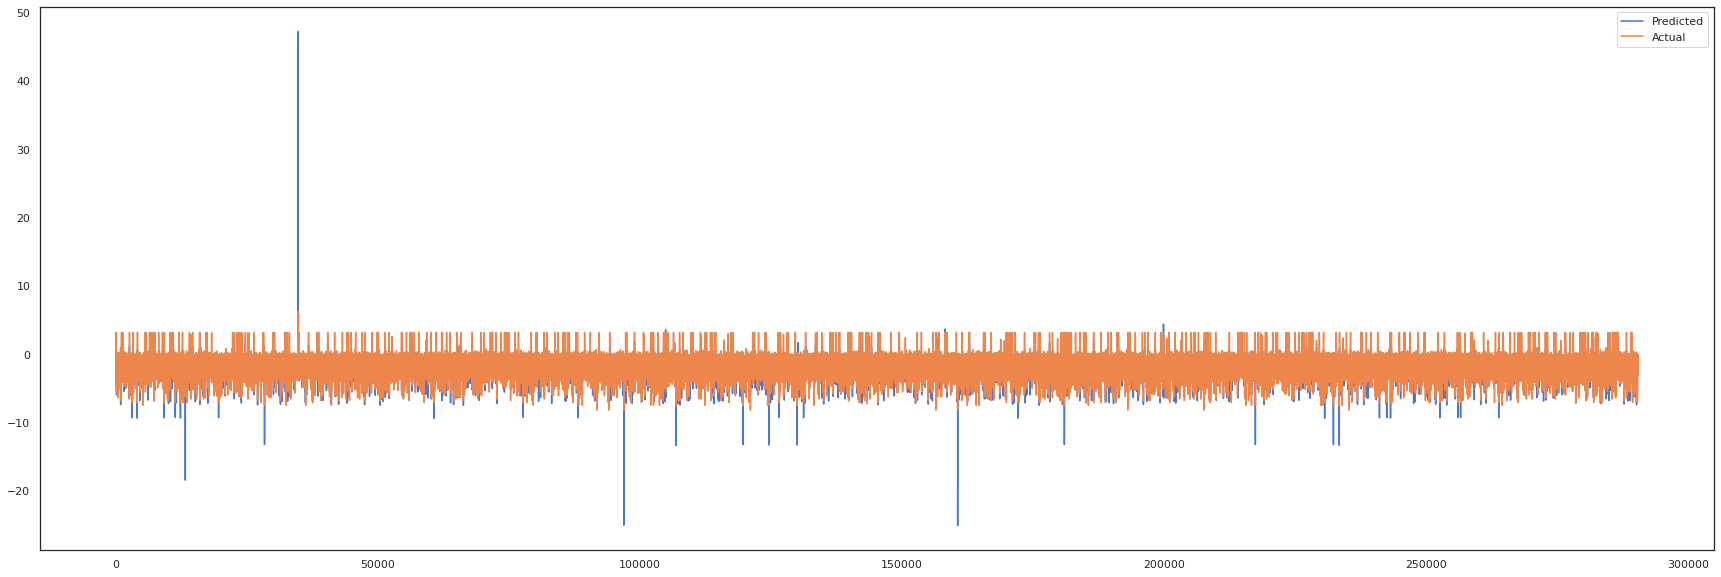

In [115]:
plt.figure(figsize=(30,10))
plt.plot((y_pred_r))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Decision Tree

In [116]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)


DecisionTreeRegressor()

In [118]:
y_pred_dtree = dtree.predict(X_test)


In [119]:
MSE  = mean_squared_error((y_test), (y_pred_dtree))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_dtree))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_dtree)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.00014765032540153632
RMSE : 0.012151145024298588
R2 : 0.9997662197388562
Adjusted R2 :  0.9997662100806434


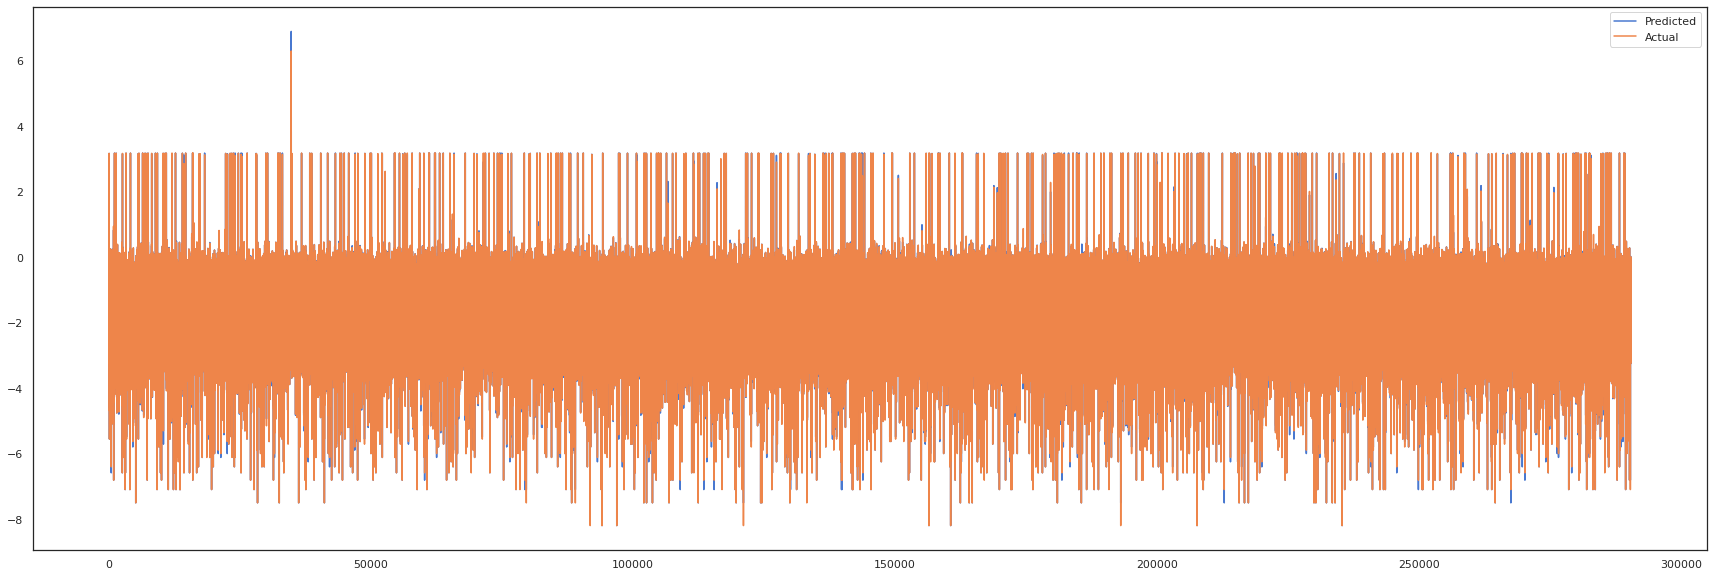

In [123]:
plt.figure(figsize=(30,10))
plt.plot((y_pred_dtree))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Random Forest

In [120]:
rforest = RandomForestRegressor(n_estimators = 20, n_jobs = -1)
rforest.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20, n_jobs=-1)

In [121]:
y_pred_rforest = rforest.predict(X_test)


In [122]:
MSE  = mean_squared_error((y_test), (y_pred_rforest))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_rforest))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_rforest)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 9.9192982734311e-05
RMSE : 0.009959567396946064
R2 : 0.9998429440548526
Adjusted R2 :  0.9998429375663676


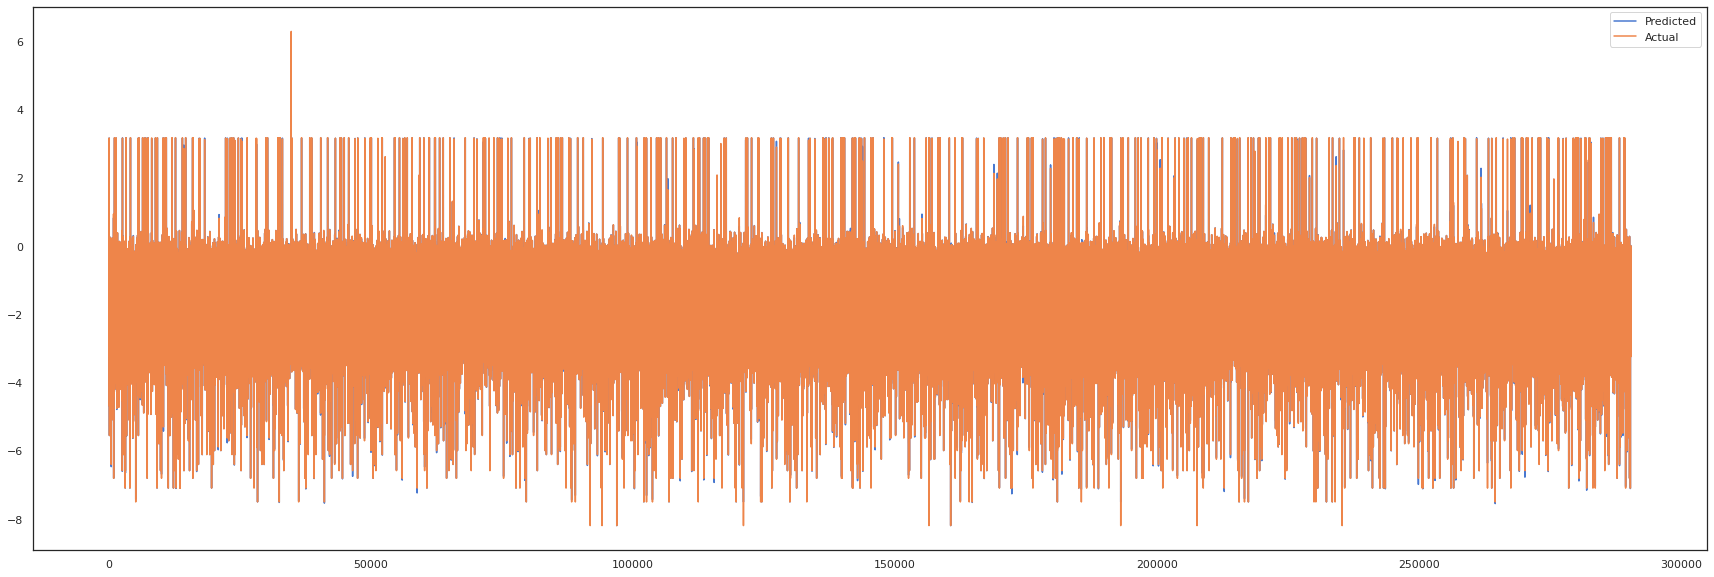

In [124]:
plt.figure(figsize=(30,10))
plt.plot((y_pred_rforest))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

The best model is Decision Tree. Since it has smallest MSE and r square is 99.98%